In [ ]:
# pure Python way to implement

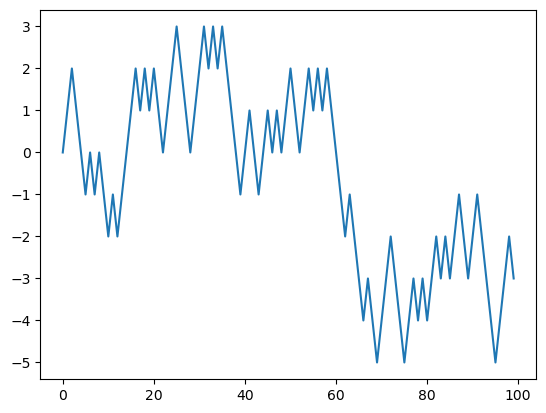

In [5]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

from matplotlib import pyplot as plt
plt.plot(walk[:100])


In [10]:
# 
import numpy as np
nsteps = 1000
rng = np.random.default_rng(seed=1234)
draws = rng.integers(0,2,size=nsteps)

steps = np.where(draws > 0,1,-1)
walk = steps.cumsum()

In [21]:
# rng.integers?
# integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

In [15]:
walk.min()

-22

In [16]:
walk.max()

19

In [19]:
# np.abs(walk) >= 10

In [17]:
(np.abs(walk) >= 10).argmax()
# we can compute this using argmax, which returns the first index of the maximum value in the boolean array
# (True is the maximum value):

39

# Simulating Many Random Walks at Once

In [26]:
nwalks = 50
nsteps = 100
draws = rng.integers(0,2,size=(nwalks,nsteps)) # 0 or 1
steps = np.where(draws > 0,1,-1)
steps

array([[ 1,  1,  1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [ 1,  1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1],
       [ 1, -1,  1, ..., -1,  1, -1]])

In [29]:
walks = steps.cumsum(1) # cumulative sum along axis 1
# axis 0 is nwalks,axis 1 is nsteps
walks

array([[  1,   2,   3, ...,  -6,  -7,  -8],
       [ -1,  -2,  -3, ...,   0,  -1,   0],
       [ -1,  -2,  -3, ..., -14, -15, -16],
       ...,
       [  1,   2,   3, ...,   8,   7,   6],
       [  1,   2,   3, ...,   0,  -1,   0],
       [  1,   0,   1, ...,  -8,  -7,  -8]])

In [40]:
hits10 = (np.abs(walks) >= 10).any(1) # test along axis 1

In [41]:
# np.any?
# Test whether any array element along a given axis evaluates to True.
# Returns single boolean if `axis` is ``None``

In [42]:
hits10

array([ True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True])

In [43]:
hits10.sum()

32

In [45]:
crossing_time = (np.abs(walks[hits10])>=10).argmax(1)
crossing_time

array([19, 39, 21, 29, 15, 13, 55, 75, 37, 93, 15, 61, 51, 91, 39, 23, 45,
       69, 67, 15, 33, 71, 99, 37, 33, 63, 97, 79, 71, 53, 33, 83],
      dtype=int64)

In [46]:
crossing_time.mean()

50.75